In [1]:
%pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement json (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
ERROR: No matching distribution found for json
Note: you may need to restart the kernel to use updated packages.


In [2]:
#install fastf1 api
%pip install fastf1
#install seaborn
%pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
#exploratory data analysis with fastf1 api
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [4]:
# continue the example
fastf1.Cache.enable_cache('cache')  # replace with your cache directory

In [5]:
# Load a session
aus_fp1 = fastf1.get_session(2024, 'Australia', 'FP1')
aus_fp1.load()

core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']


In [6]:
# Get laps
laps = aus_fp1.laps
# Display the first few rows of the laps DataFrame
laps.head()


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:20:26.552000,VER,1,0 days 00:01:47.251000,1.0,1.0,0 days 00:18:41.444000,NaT,0 days 00:00:38.110000,0 days 00:00:19.684000,...,True,Red Bull Racing,0 days 00:18:41.444000,2024-03-22 01:33:42.227,1,NaN,False,,False,False
1,0 days 00:21:47.902000,VER,1,0 days 00:01:21.350000,2.0,1.0,NaT,NaT,0 days 00:00:28.462000,0 days 00:00:18.219000,...,True,Red Bull Racing,0 days 00:20:26.552000,2024-03-22 01:35:27.335,1,NaN,False,,False,True
2,0 days 00:24:04.063000,VER,1,0 days 00:02:16.161000,3.0,1.0,NaT,0 days 00:23:45.557000,0 days 00:00:47.813000,0 days 00:00:25.644000,...,True,Red Bull Racing,0 days 00:21:47.902000,2024-03-22 01:36:48.685,1,NaN,False,,False,False
3,0 days 00:25:53.063000,VER,1,0 days 00:01:49,4.0,2.0,0 days 00:24:06.156000,NaT,0 days 00:00:38.560000,0 days 00:00:21.725000,...,False,Red Bull Racing,0 days 00:24:04.063000,2024-03-22 01:39:04.846,1,NaN,False,,False,False
4,0 days 00:27:12.763000,VER,1,0 days 00:01:19.700000,5.0,2.0,NaT,NaT,0 days 00:00:27.886000,0 days 00:00:17.904000,...,False,Red Bull Racing,0 days 00:25:53.063000,2024-03-22 01:40:53.846,1,NaN,False,,False,True


In [17]:
# filter for just carlos sainz
sainz_laps_fp1 = laps.pick_driver('SAI')
sainz_laps_fp1.head()


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
348,0 days 00:23:17.291000,SAI,55,0 days 00:01:21.004000,1.0,NaN,NaT,NaT,0 days 00:00:28.287000,0 days 00:00:18.248000,...,True,Ferrari,NaT,NaT,1,NaN,False,,False,True
349,0 days 00:23:17.325000,SAI,55,NaT,2.0,NaN,0 days 00:23:17.291000,NaT,0 days 00:00:54.601000,NaT,...,True,Ferrari,0 days 00:23:17.291000,2024-03-22 01:38:18.074,1,NaN,False,,False,False
350,0 days 00:25:39.436000,SAI,55,0 days 00:02:22.111000,3.0,NaN,NaT,NaT,0 days 00:00:54.601000,0 days 00:00:31.758000,...,True,Ferrari,0 days 00:23:17.325000,2024-03-22 01:38:18.108,1,NaN,False,,False,True
351,0 days 00:26:59.583000,SAI,55,0 days 00:01:20.147000,4.0,NaN,NaT,NaT,0 days 00:00:28.005000,0 days 00:00:18.108000,...,True,Ferrari,0 days 00:25:39.436000,2024-03-22 01:40:40.219,1,NaN,False,,False,True
352,0 days 00:29:09.523000,SAI,55,0 days 00:02:09.940000,5.0,NaN,NaT,0 days 00:28:50.388000,0 days 00:00:39.131000,0 days 00:00:25.174000,...,True,Ferrari,0 days 00:26:59.583000,2024-03-22 01:42:00.366,1,NaN,False,,False,False


In [18]:
# analyze data by compounds
sainz_laps_fp1['Compound'].value_counts()

Compound
SOFT    16
nan      5
Name: count, dtype: int64

In [19]:
# Load a session
aus_fp2 = fastf1.get_session(2024, 'Australia', 'FP2')
aus_fp2.load()
# filter for just carlos sainz
sainz_laps_fp2 = laps.pick_driver('SAI')
sainz_laps_fp2

core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24',

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
348,0 days 00:23:17.291000,SAI,55,0 days 00:01:21.004000,1.0,NaN,NaT,NaT,0 days 00:00:28.287000,0 days 00:00:18.248000,...,True,Ferrari,NaT,NaT,1,NaN,False,,False,True
349,0 days 00:23:17.325000,SAI,55,NaT,2.0,NaN,0 days 00:23:17.291000,NaT,0 days 00:00:54.601000,NaT,...,True,Ferrari,0 days 00:23:17.291000,2024-03-22 01:38:18.074,1,NaN,False,,False,False
350,0 days 00:25:39.436000,SAI,55,0 days 00:02:22.111000,3.0,NaN,NaT,NaT,0 days 00:00:54.601000,0 days 00:00:31.758000,...,True,Ferrari,0 days 00:23:17.325000,2024-03-22 01:38:18.108,1,NaN,False,,False,True
351,0 days 00:26:59.583000,SAI,55,0 days 00:01:20.147000,4.0,NaN,NaT,NaT,0 days 00:00:28.005000,0 days 00:00:18.108000,...,True,Ferrari,0 days 00:25:39.436000,2024-03-22 01:40:40.219,1,NaN,False,,False,True
352,0 days 00:29:09.523000,SAI,55,0 days 00:02:09.940000,5.0,NaN,NaT,0 days 00:28:50.388000,0 days 00:00:39.131000,0 days 00:00:25.174000,...,True,Ferrari,0 days 00:26:59.583000,2024-03-22 01:42:00.366,1,NaN,False,,False,False
353,0 days 00:31:23.140000,SAI,55,0 days 00:02:13.617000,6.0,1.0,0 days 00:29:12.806000,NaT,0 days 00:01:00.553000,0 days 00:00:28.357000,...,True,Ferrari,0 days 00:29:09.523000,2024-03-22 01:44:10.306,1,NaN,False,,False,False
354,0 days 00:32:42.578000,SAI,55,0 days 00:01:19.438000,7.0,1.0,NaT,NaT,0 days 00:00:27.767000,0 days 00:00:18.052000,...,True,Ferrari,0 days 00:31:23.140000,2024-03-22 01:46:23.923,1,NaN,False,,False,True
355,0 days 00:45:52.372000,SAI,55,NaT,8.0,1.0,NaT,0 days 00:34:22.645000,0 days 00:00:36.084000,0 days 00:00:22.417000,...,True,Ferrari,0 days 00:32:42.578000,2024-03-22 01:47:43.361,1,NaN,False,,False,False
356,0 days 00:47:36.929000,SAI,55,0 days 00:01:44.557000,9.0,2.0,0 days 00:45:54.678000,NaT,0 days 00:00:40.199000,0 days 00:00:19.834000,...,False,Ferrari,0 days 00:45:52.372000,2024-03-22 02:00:53.155,1,NaN,False,,False,False
357,0 days 00:48:56.292000,SAI,55,0 days 00:01:19.363000,10.0,2.0,NaT,NaT,0 days 00:00:27.375000,0 days 00:00:18.104000,...,False,Ferrari,0 days 00:47:36.929000,2024-03-22 02:02:37.712,1,NaN,False,,False,True


In [20]:
# compare the two fastes laps in the same FP2, with throttle, speed, rpm, gear, brake
sainz_fastest_fp2 = sainz_laps_fp2.pick_fastest()
sainz_fastest_fp2

Time                      0 days 01:13:10.785000
Driver                                       SAI
DriverNumber                                  55
LapTime                   0 days 00:01:18.686000
LapNumber                                   17.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:27.397000
Sector2Time               0 days 00:00:17.969000
Sector3Time               0 days 00:00:33.320000
Sector1SessionTime        0 days 01:12:19.496000
Sector2SessionTime        0 days 01:12:37.465000
Sector3SessionTime        0 days 01:13:10.785000
SpeedI1                                    281.0
SpeedI2                                    313.0
SpeedFL                                    296.0
SpeedST                                    316.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

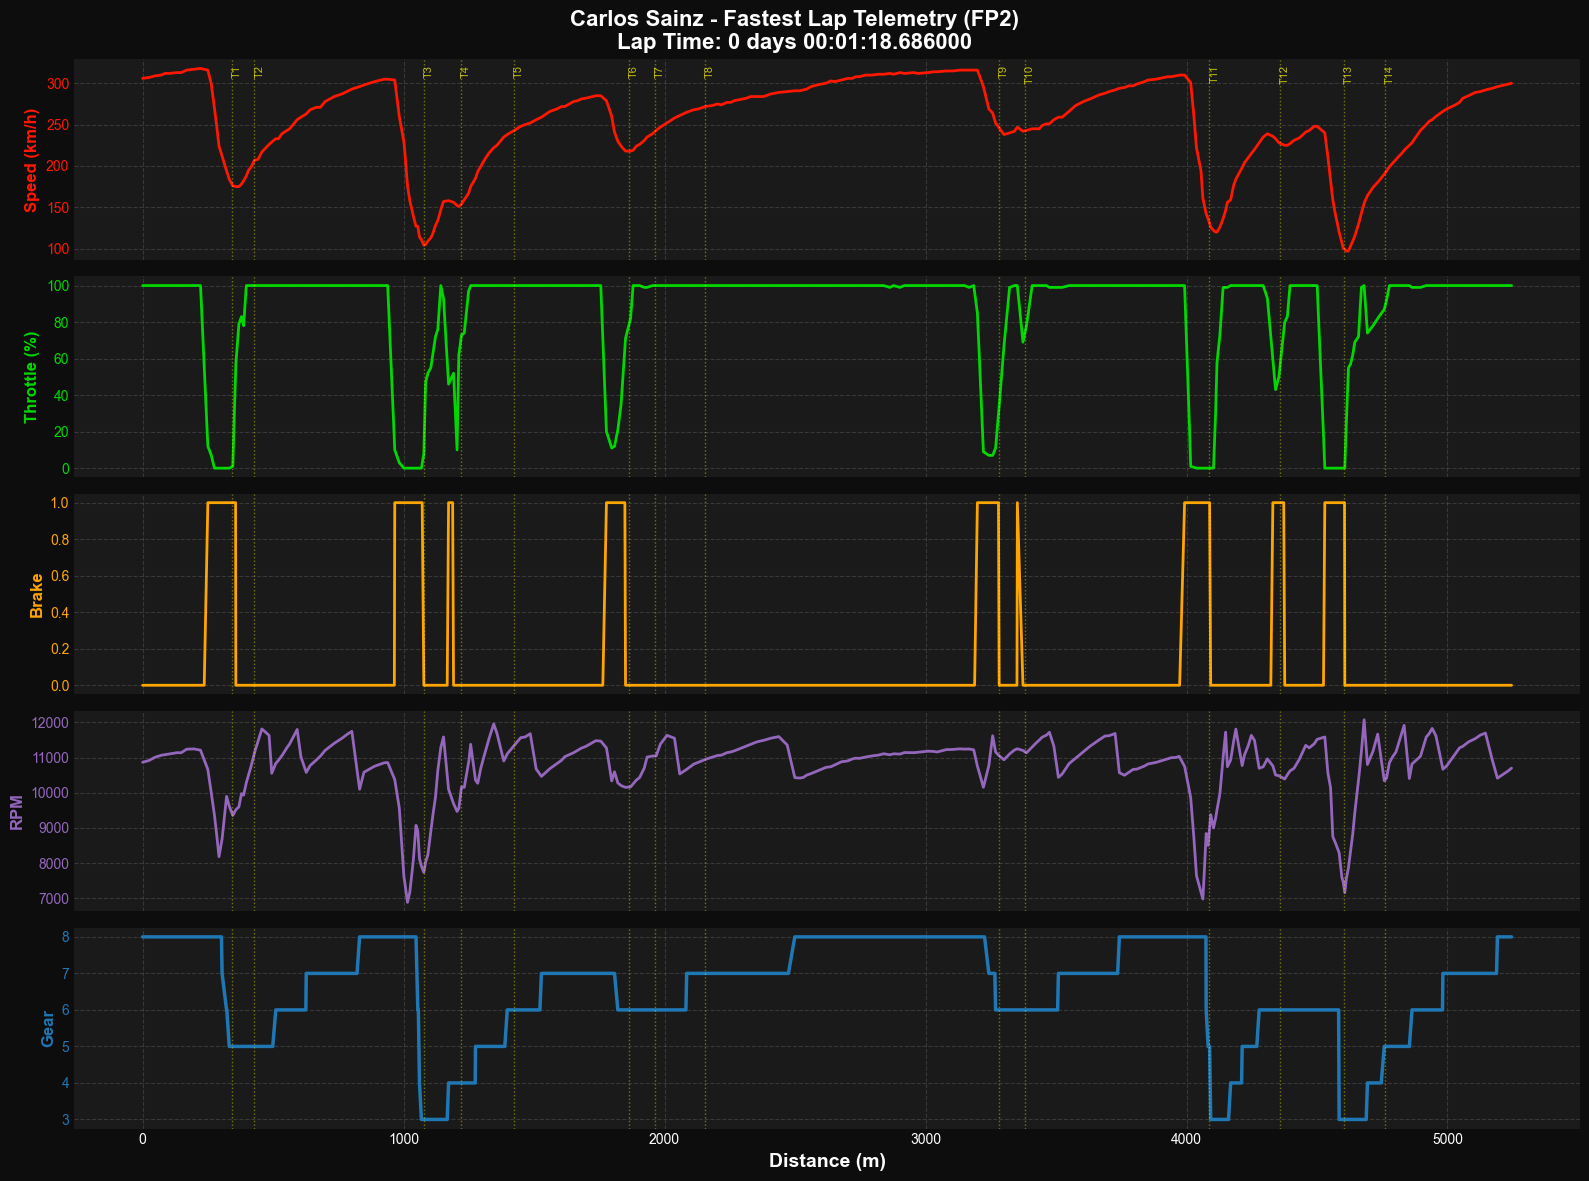

In [21]:
# Create separate subplots for each telemetry parameter with dark mode
telemetry = sainz_fastest_fp2.get_telemetry()

# Get circuit information for turn markers
circuit_info = aus_fp2.get_circuit_info()

# Set dark background style
plt.style.use('dark_background')

fig, axs = plt.subplots(5, 1, figsize=(16, 12), sharex=True)

# Plot Speed
axs[0].plot(telemetry['Distance'], telemetry['Speed'], color='#FF1801', linewidth=2)
axs[0].set_ylabel('Speed (km/h)', fontsize=12, fontweight='bold', color='#FF1801')
axs[0].tick_params(axis='y', labelcolor='#FF1801')
axs[0].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[0].set_facecolor('#1a1a1a')

# Plot Throttle
axs[1].plot(telemetry['Distance'], telemetry['Throttle'], color='#00D800', linewidth=2)
axs[1].set_ylabel('Throttle (%)', fontsize=12, fontweight='bold', color='#00D800')
axs[1].tick_params(axis='y', labelcolor='#00D800')
axs[1].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[1].set_facecolor('#1a1a1a')

# Plot Brake
axs[2].plot(telemetry['Distance'], telemetry['Brake'], color='#FFA500', linewidth=2)
axs[2].set_ylabel('Brake', fontsize=12, fontweight='bold', color='#FFA500')
axs[2].tick_params(axis='y', labelcolor='#FFA500')
axs[2].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[2].set_facecolor('#1a1a1a')

# Plot RPM
axs[3].plot(telemetry['Distance'], telemetry['RPM'], color='#9467BD', linewidth=2)
axs[3].set_ylabel('RPM', fontsize=12, fontweight='bold', color='#9467BD')
axs[3].tick_params(axis='y', labelcolor='#9467BD')
axs[3].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[3].set_facecolor('#1a1a1a')

# Plot Gear
axs[4].plot(telemetry['Distance'], telemetry['nGear'], color='#1F77B4', linewidth=2.5)
axs[4].set_ylabel('Gear', fontsize=12, fontweight='bold', color='#1F77B4')
axs[4].set_xlabel('Distance (m)', fontsize=14, fontweight='bold')
axs[4].tick_params(axis='y', labelcolor='#1F77B4')
axs[4].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[4].set_facecolor('#1a1a1a')

# Add turn markers as vertical lines across all subplots
for _, corner in circuit_info.corners.iterrows():
    corner_distance = corner['Distance']
    for ax in axs:
        ax.axvline(x=corner_distance, color='yellow', linestyle=':', alpha=0.4, linewidth=1)
    # Add turn number at the top subplot
    axs[0].text(corner_distance, axs[0].get_ylim()[1]*0.98, f"T{int(corner['Number'])}", 
                rotation=90, fontsize=8, color='yellow', alpha=0.7, va='top')

# Add title
fig.suptitle(f'Carlos Sainz - Fastest Lap Telemetry (FP2)\nLap Time: {sainz_fastest_fp2["LapTime"]}', 
             fontsize=16, fontweight='bold', color='white')

fig.patch.set_facecolor('#0d0d0d')
plt.tight_layout()
plt.show()


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']


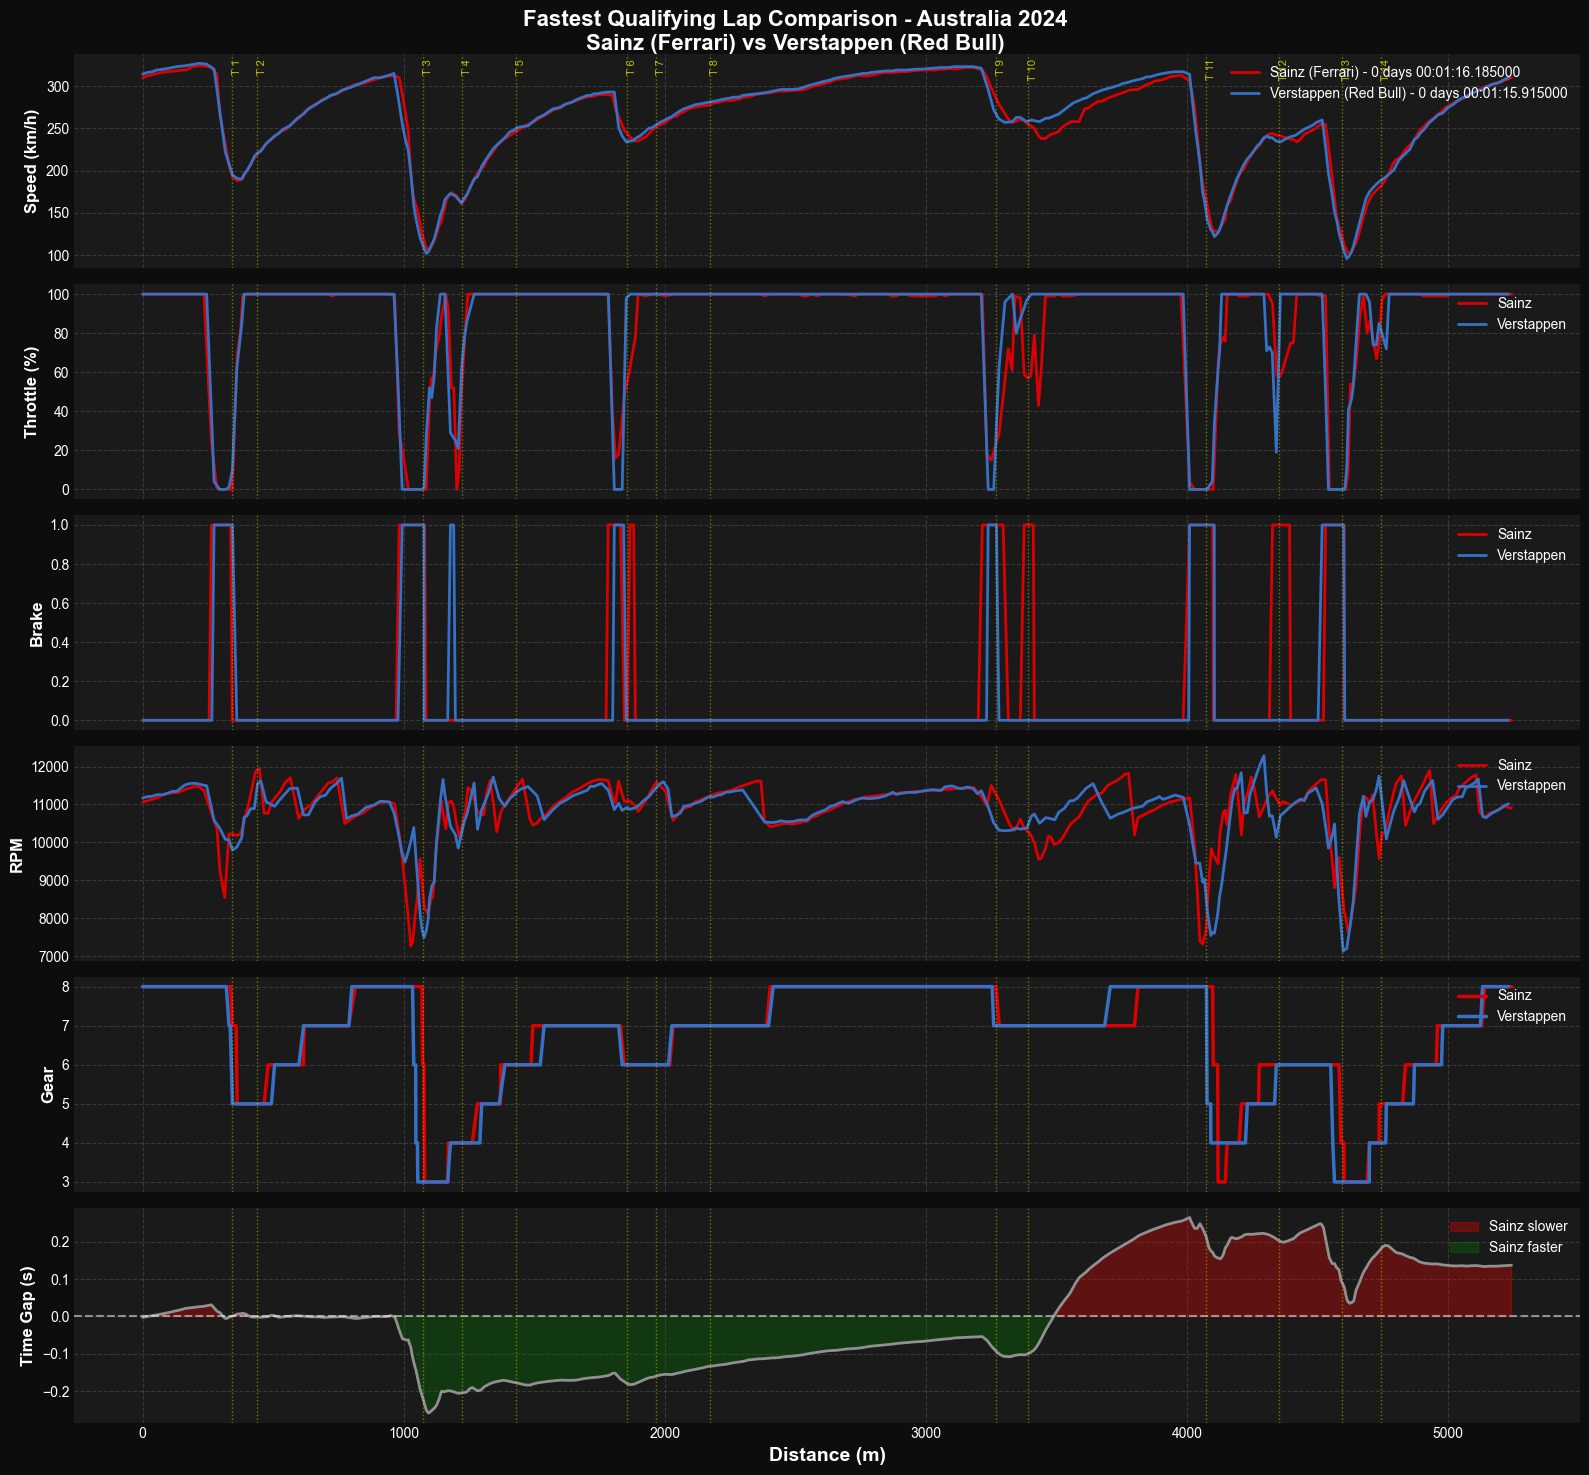

Sainz fastest lap: 0 days 00:01:16.185000
Verstappen fastest lap: 0 days 00:01:15.915000


In [22]:
from scipy.interpolate import interp1d

# Load qualifying session
aus_quali = fastf1.get_session(2024, 'Australia', 'Q')
aus_quali.load()

# Get fastest laps for both drivers
sainz_fastest_quali = aus_quali.laps.pick_driver('SAI').pick_fastest()
ver_fastest_quali = aus_quali.laps.pick_driver('VER').pick_fastest()

# Get telemetry for both laps
sainz_tel = sainz_fastest_quali.get_telemetry()
ver_tel = ver_fastest_quali.get_telemetry()

# Get circuit information for turn markers
circuit_info = aus_quali.get_circuit_info()

# Calculate time delta by interpolating to common distance points
common_distance = sainz_tel['Distance'].values

sainz_time = sainz_tel['Time'].dt.total_seconds().values
ver_time = ver_tel['Time'].dt.total_seconds().values

sainz_time_interp = interp1d(sainz_tel['Distance'], sainz_time, fill_value='extrapolate')
ver_time_interp = interp1d(ver_tel['Distance'], ver_time, fill_value='extrapolate')

time_delta = sainz_time_interp(common_distance) - ver_time_interp(common_distance)

plt.style.use('dark_background')

fig, axs = plt.subplots(6, 1, figsize=(16, 15), sharex=True)

# Ferrari red and Red Bull blue colors
ferrari_red = '#DC0000'
redbull_blue = '#3671C6'

# Plot Speed comparison
axs[0].plot(sainz_tel['Distance'], sainz_tel['Speed'], color=ferrari_red, linewidth=2, label=f'Sainz (Ferrari) - {sainz_fastest_quali["LapTime"]}')
axs[0].plot(ver_tel['Distance'], ver_tel['Speed'], color=redbull_blue, linewidth=2, label=f'Verstappen (Red Bull) - {ver_fastest_quali["LapTime"]}')
axs[0].set_ylabel('Speed (km/h)', fontsize=12, fontweight='bold')
axs[0].legend(loc='upper right')
axs[0].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[0].set_facecolor('#1a1a1a')

# Plot Throttle comparison
axs[1].plot(sainz_tel['Distance'], sainz_tel['Throttle'], color=ferrari_red, linewidth=2, label='Sainz')
axs[1].plot(ver_tel['Distance'], ver_tel['Throttle'], color=redbull_blue, linewidth=2, label='Verstappen')
axs[1].set_ylabel('Throttle (%)', fontsize=12, fontweight='bold')
axs[1].legend(loc='upper right')
axs[1].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[1].set_facecolor('#1a1a1a')

# Plot Brake comparison
axs[2].plot(sainz_tel['Distance'], sainz_tel['Brake'], color=ferrari_red, linewidth=2, label='Sainz')
axs[2].plot(ver_tel['Distance'], ver_tel['Brake'], color=redbull_blue, linewidth=2, label='Verstappen')
axs[2].set_ylabel('Brake', fontsize=12, fontweight='bold')
axs[2].legend(loc='upper right')
axs[2].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[2].set_facecolor('#1a1a1a')

# Plot RPM comparison
axs[3].plot(sainz_tel['Distance'], sainz_tel['RPM'], color=ferrari_red, linewidth=2, label='Sainz')
axs[3].plot(ver_tel['Distance'], ver_tel['RPM'], color=redbull_blue, linewidth=2, label='Verstappen')
axs[3].set_ylabel('RPM', fontsize=12, fontweight='bold')
axs[3].legend(loc='upper right')
axs[3].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[3].set_facecolor('#1a1a1a')

# Plot Gear comparison
axs[4].plot(sainz_tel['Distance'], sainz_tel['nGear'], color=ferrari_red, linewidth=2.5, label='Sainz')
axs[4].plot(ver_tel['Distance'], ver_tel['nGear'], color=redbull_blue, linewidth=2.5, label='Verstappen')
axs[4].set_ylabel('Gear', fontsize=12, fontweight='bold')
axs[4].legend(loc='upper right')
axs[4].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[4].set_facecolor('#1a1a1a')

# Plot Time Delta
axs[5].plot(common_distance, time_delta, color="#909090", linewidth=2)
axs[5].axhline(y=0, color='white', linestyle='--', alpha=0.5)
axs[5].set_ylabel('Time Gap (s)', fontsize=12, fontweight='bold', color='#FFFFFF')
axs[5].set_xlabel('Distance (m)', fontsize=14, fontweight='bold', color='#FFFFFF')
axs[5].tick_params(axis='y', labelcolor='#FFFFFF')
axs[5].grid(True, alpha=0.3, linestyle='--', color='gray')
axs[5].set_facecolor('#1a1a1a')
axs[5].fill_between(common_distance, time_delta, 0, where=(time_delta >= 0), color='red', alpha=0.3, label='Sainz slower')
axs[5].fill_between(common_distance, time_delta, 0, where=(time_delta < 0), color='green', alpha=0.3, label='Sainz faster')
axs[5].legend(loc='upper right')

# Add turn markers as vertical lines across all subplots
for _, corner in circuit_info.corners.iterrows():
    corner_distance = corner['Distance']
    for ax in axs:
        ax.axvline(x=corner_distance, color='yellow', linestyle=':', alpha=0.4, linewidth=1)
    # Add turn number at the top subplot
    axs[0].text(corner_distance, axs[0].get_ylim()[1]*0.98, f"T {int(corner['Number'])}", 
                rotation=90, fontsize=8, color='yellow', alpha=0.7, va='top')

# Add title
fig.suptitle(f'Fastest Qualifying Lap Comparison - Australia 2024\nSainz (Ferrari) vs Verstappen (Red Bull)', 
             fontsize=16, fontweight='bold', color='white')

fig.patch.set_facecolor('#0d0d0d')
plt.tight_layout()
plt.show()

print(f"Sainz fastest lap: {sainz_fastest_quali['LapTime']}")
print(f"Verstappen fastest lap: {ver_fastest_quali['LapTime']}")


In [23]:
# OpenF1 API Helper Functions
class OpenF1:
    """A modular class to interact with the OpenF1 API"""
    
    BASE_URL = "https://api.openf1.org/v1"
    
    @staticmethod
    def _make_request(endpoint, params=None):
        """
        Make a GET request to the OpenF1 API
        
        Args:
            endpoint (str): API endpoint (e.g., 'sessions', 'drivers', 'laps')
            params (dict): Query parameters
            
        Returns:
            list: JSON response data
        """
        url = f"{OpenF1.BASE_URL}/{endpoint}"
        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"❌ Error fetching data: {e}")
            return []
    
    @staticmethod
    def get_sessions(year=None, country=None, session_name=None):
        """Get session information"""
        params = {}
        if year:
            params['year'] = year
        if country:
            params['country_name'] = country
        if session_name:
            params['session_name'] = session_name
        
        data = OpenF1._make_request('sessions', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_drivers(session_key=None, driver_number=None):
        """Get driver information"""
        params = {}
        if session_key:
            params['session_key'] = session_key
        if driver_number:
            params['driver_number'] = driver_number
            
        data = OpenF1._make_request('drivers', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_laps(session_key, driver_number=None, lap_number=None):
        """Get lap data"""
        params = {'session_key': session_key}
        if driver_number:
            params['driver_number'] = driver_number
        if lap_number:
            params['lap_number'] = lap_number
            
        data = OpenF1._make_request('laps', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_position(session_key, driver_number=None):
        """Get position data"""
        params = {'session_key': session_key}
        if driver_number:
            params['driver_number'] = driver_number
            
        data = OpenF1._make_request('position', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_car_data(session_key, driver_number=None):
        """Get car telemetry data"""
        params = {'session_key': session_key}
        if driver_number:
            params['driver_number'] = driver_number
            
        data = OpenF1._make_request('car_data', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_intervals(session_key):
        """Get timing intervals"""
        params = {'session_key': session_key}
        data = OpenF1._make_request('intervals', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_stints(session_key, driver_number=None):
        """Get stint information"""
        params = {'session_key': session_key}
        if driver_number:
            params['driver_number'] = driver_number
            
        data = OpenF1._make_request('stints', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_pit_stops(session_key, driver_number=None):
        """Get pit stop data"""
        params = {'session_key': session_key}
        if driver_number:
            params['driver_number'] = driver_number
            
        data = OpenF1._make_request('pit', params)
        return pd.DataFrame(data) if data else pd.DataFrame()
    
    @staticmethod
    def get_weather(session_key):
        """Get weather data"""
        params = {'session_key': session_key}
        data = OpenF1._make_request('weather', params)
        return pd.DataFrame(data) if data else pd.DataFrame()

# Example usage
print("✅ OpenF1 API functions created successfully!")
print("\nAvailable methods:")
print("- OpenF1.get_sessions(year, country, session_name)")
print("- OpenF1.get_drivers(session_key, driver_number)")
print("- OpenF1.get_laps(session_key, driver_number, lap_number)")
print("- OpenF1.get_position(session_key, driver_number)")
print("- OpenF1.get_car_data(session_key, driver_number)")
print("- OpenF1.get_intervals(session_key)")
print("- OpenF1.get_stints(session_key, driver_number)")
print("- OpenF1.get_pit_stops(session_key, driver_number)")
print("- OpenF1.get_weather(session_key)")

✅ OpenF1 API functions created successfully!

Available methods:
- OpenF1.get_sessions(year, country, session_name)
- OpenF1.get_drivers(session_key, driver_number)
- OpenF1.get_laps(session_key, driver_number, lap_number)
- OpenF1.get_position(session_key, driver_number)
- OpenF1.get_car_data(session_key, driver_number)
- OpenF1.get_intervals(session_key)
- OpenF1.get_stints(session_key, driver_number)
- OpenF1.get_pit_stops(session_key, driver_number)
- OpenF1.get_weather(session_key)


In [24]:
class OpenF1Interactive:
    """Interactive wrapper for OpenF1 API - designed for frontend integration"""
    
    def __init__(self):
        self.current_session = None
        self.current_drivers = []
        
    def get_available_years(self):
        """Get list of available years"""
        sessions = OpenF1.get_sessions()
        if not sessions.empty:
            years = sorted(sessions['year'].unique(), reverse=True)
            return years
        return []
    
    def get_available_countries(self, year=None):
        """Get list of available countries/races for a given year"""
        sessions = OpenF1.get_sessions(year=year)
        if not sessions.empty:
            countries = sessions['country_name'].unique()
            return sorted([c for c in countries if c])
        return []
    
    def get_available_sessions(self, year, country):
        """Get available session types (FP1, FP2, Qualifying, Race, etc.)"""
        sessions = OpenF1.get_sessions(year=year, country=country)
        if not sessions.empty:
            session_list = []
            for _, row in sessions.iterrows():
                session_list.append({
                    'name': row['session_name'],
                    'key': row['session_key'],
                    'date': row['date_start']
                })
            return session_list
        return []
    
    def set_session(self, session_key):
        """Set the current session context"""
        self.current_session = session_key
        # Load drivers for this session
        drivers_df = OpenF1.get_drivers(session_key=session_key)
        if not drivers_df.empty:
            self.current_drivers = drivers_df.to_dict('records')
        return True
    
    def get_drivers_list(self):
        """Get list of drivers in current session (for dropdown/selector)"""
        if not self.current_drivers:
            return []
        
        driver_options = []
        for driver in self.current_drivers:
            driver_options.append({
                'number': driver.get('driver_number'),
                'name': f"{driver.get('first_name')} {driver.get('last_name')}",
                'code': driver.get('name_acronym'),
                'team': driver.get('team_name')
            })
        return sorted(driver_options, key=lambda x: x['number'])
    
    def get_driver_lap_times(self, driver_number):
        """Get all lap times for a driver (for lap selector)"""
        if not self.current_session:
            return []
        
        laps = OpenF1.get_laps(session_key=self.current_session, driver_number=driver_number)
        if laps.empty:
            return []
        
        lap_data = []
        for _, lap in laps.iterrows():
            lap_data.append({
                'lap_number': lap['lap_number'],
                'lap_time': lap['lap_duration'],
                'is_pit': lap.get('is_pit_out_lap', False)
            })
        return lap_data
    
    def compare_drivers(self, driver_numbers):
        """
        Compare multiple drivers in the current session
        
        Args:
            driver_numbers (list): List of driver numbers to compare
            
        Returns:
            dict: Comparison data ready for visualization
        """
        if not self.current_session:
            return {}
        
        comparison_data = {}
        for driver_num in driver_numbers:
            laps = OpenF1.get_laps(session_key=self.current_session, driver_number=driver_num)
            if not laps.empty:
                comparison_data[driver_num] = {
                    'laps': laps.to_dict('records'),
                    'best_lap': laps['lap_duration'].min() if 'lap_duration' in laps else None,
                    'avg_lap': laps['lap_duration'].mean() if 'lap_duration' in laps else None
                }
        
        return comparison_data
    
    def get_telemetry_data(self, driver_number, lap_number=None):
        """
        Get telemetry data for visualization
        
        Args:
            driver_number: Driver number
            lap_number: Specific lap (None for all session data)
            
        Returns:
            dict: Telemetry data ready for plotting
        """
        if not self.current_session:
            return {}
        
        car_data = OpenF1.get_car_data(session_key=self.current_session, driver_number=driver_number)
        
        if car_data.empty:
            return {}
        
        telemetry = {
            'speed': car_data['speed'].tolist() if 'speed' in car_data else [],
            'throttle': car_data['throttle'].tolist() if 'throttle' in car_data else [],
            'brake': car_data['brake'].tolist() if 'brake' in car_data else [],
            'rpm': car_data['rpm'].tolist() if 'rpm' in car_data else [],
            'gear': car_data['n_gear'].tolist() if 'n_gear' in car_data else [],
            'drs': car_data['drs'].tolist() if 'drs' in car_data else []
        }
        
        return telemetry
    
    def get_race_summary(self):
        """Get race/session summary (for dashboard)"""
        if not self.current_session:
            return {}
        
        intervals = OpenF1.get_intervals(session_key=self.current_session)
        weather = OpenF1.get_weather(session_key=self.current_session)
        
        summary = {
            'total_drivers': len(self.current_drivers),
            'weather': weather.to_dict('records') if not weather.empty else [],
            'intervals': intervals.to_dict('records') if not intervals.empty else []
        }
        
        return summary
    
    def get_pit_stop_summary(self, driver_number=None):
        """Get pit stop summary (for pit strategy analysis)"""
        if not self.current_session:
            return []
        
        pit_stops = OpenF1.get_pit_stops(session_key=self.current_session, driver_number=driver_number)
        
        if pit_stops.empty:
            return []
        
        return pit_stops.to_dict('records')
    
    def get_stint_analysis(self, driver_number=None):
        """Get stint information (for tire strategy)"""
        if not self.current_session:
            return []
        
        stints = OpenF1.get_stints(session_key=self.current_session, driver_number=driver_number)
        
        if stints.empty:
            return []
        
        stint_summary = []
        for _, stint in stints.iterrows():
            stint_summary.append({
                'driver_number': stint['driver_number'],
                'stint_number': stint['stint_number'],
                'compound': stint.get('compound'),
                'lap_start': stint.get('lap_start'),
                'lap_end': stint.get('lap_end')
            })
        
        return stint_summary

# Create global instance for easy access
f1_interactive = OpenF1Interactive()

print("✅ Interactive F1 API wrapper created successfully!")
print("\nFrontend-friendly methods:")
print("- f1_interactive.get_available_years()")
print("- f1_interactive.get_available_countries(year)")
print("- f1_interactive.get_available_sessions(year, country)")
print("- f1_interactive.set_session(session_key)")
print("- f1_interactive.get_drivers_list()")
print("- f1_interactive.get_driver_lap_times(driver_number)")
print("- f1_interactive.compare_drivers([driver1, driver2])")
print("- f1_interactive.get_telemetry_data(driver_number)")
print("- f1_interactive.get_race_summary()")
print("- f1_interactive.get_pit_stop_summary(driver_number)")
print("- f1_interactive.get_stint_analysis(driver_number)")

✅ Interactive F1 API wrapper created successfully!

Frontend-friendly methods:
- f1_interactive.get_available_years()
- f1_interactive.get_available_countries(year)
- f1_interactive.get_available_sessions(year, country)
- f1_interactive.set_session(session_key)
- f1_interactive.get_drivers_list()
- f1_interactive.get_driver_lap_times(driver_number)
- f1_interactive.compare_drivers([driver1, driver2])
- f1_interactive.get_telemetry_data(driver_number)
- f1_interactive.get_race_summary()
- f1_interactive.get_pit_stop_summary(driver_number)
- f1_interactive.get_stint_analysis(driver_number)


In [25]:
import unittest
from unittest.mock import Mock, patch, MagicMock

class TestOpenF1Interactive(unittest.TestCase):
    """Test suite for OpenF1Interactive class"""
    
    def setUp(self):
        """Set up test fixtures before each test method"""
        self.f1 = OpenF1Interactive()
    
    def tearDown(self):
        """Clean up after each test method"""
        self.f1.current_session = None
        self.f1.current_drivers = []
    
    @patch('__main__.OpenF1.get_sessions')
    def test_get_available_years_success(self, mock_get_sessions):
        """Test getting available years when data exists"""
        mock_df = pd.DataFrame({'year': [2024, 2023, 2023, 2022]})
        mock_get_sessions.return_value = mock_df
        
        years = self.f1.get_available_years()
        
        self.assertEqual(years, [2024, 2023, 2022])
        mock_get_sessions.assert_called_once()
    
    @patch('__main__.OpenF1.get_sessions')
    def test_get_available_years_empty(self, mock_get_sessions):
        """Test getting available years when no data exists"""
        mock_get_sessions.return_value = pd.DataFrame()
        
        years = self.f1.get_available_years()
        
        self.assertEqual(years, [])
    
    @patch('__main__.OpenF1.get_sessions')
    def test_get_available_countries_with_year(self, mock_get_sessions):
        """Test getting countries for a specific year"""
        mock_df = pd.DataFrame({
            'country_name': ['Australia', 'Bahrain', 'Australia', None]
        })
        mock_get_sessions.return_value = mock_df
        
        countries = self.f1.get_available_countries(year=2024)
        
        self.assertEqual(sorted(countries), ['Australia', 'Bahrain'])
        mock_get_sessions.assert_called_once_with(year=2024)
    
    @patch('__main__.OpenF1.get_sessions')
    def test_get_available_countries_empty(self, mock_get_sessions):
        """Test getting countries when no data exists"""
        mock_get_sessions.return_value = pd.DataFrame()
        
        countries = self.f1.get_available_countries(year=2024)
        
        self.assertEqual(countries, [])
    
    @patch('__main__.OpenF1.get_sessions')
    def test_get_available_sessions_success(self, mock_get_sessions):
        """Test getting available sessions for a country and year"""
        mock_df = pd.DataFrame({
            'session_name': ['FP1', 'Qualifying', 'Race'],
            'session_key': [1001, 1002, 1003],
            'date_start': ['2024-03-22', '2024-03-23', '2024-03-24']
        })
        mock_get_sessions.return_value = mock_df
        
        sessions = self.f1.get_available_sessions(2024, 'Australia')
        
        self.assertEqual(len(sessions), 3)
        self.assertEqual(sessions[0]['name'], 'FP1')
        self.assertEqual(sessions[0]['key'], 1001)
        mock_get_sessions.assert_called_once_with(year=2024, country='Australia')
    
    @patch('__main__.OpenF1.get_sessions')
    def test_get_available_sessions_empty(self, mock_get_sessions):
        """Test getting sessions when no data exists"""
        mock_get_sessions.return_value = pd.DataFrame()
        
        sessions = self.f1.get_available_sessions(2024, 'Australia')
        
        self.assertEqual(sessions, [])
    
    @patch('__main__.OpenF1.get_drivers')
    def test_set_session_success(self, mock_get_drivers):
        """Test setting current session with drivers"""
        mock_df = pd.DataFrame({
            'driver_number': [55, 1],
            'first_name': ['Carlos', 'Max'],
            'last_name': ['Sainz', 'Verstappen'],
            'name_acronym': ['SAI', 'VER'],
            'team_name': ['Ferrari', 'Red Bull Racing']
        })
        mock_get_drivers.return_value = mock_df
        
        result = self.f1.set_session(9158)
        
        self.assertTrue(result)
        self.assertEqual(self.f1.current_session, 9158)
        self.assertEqual(len(self.f1.current_drivers), 2)
        mock_get_drivers.assert_called_once_with(session_key=9158)
    
    @patch('__main__.OpenF1.get_drivers')
    def test_set_session_no_drivers(self, mock_get_drivers):
        """Test setting session when no drivers available"""
        mock_get_drivers.return_value = pd.DataFrame()
        
        result = self.f1.set_session(9158)
        
        self.assertTrue(result)
        self.assertEqual(self.f1.current_session, 9158)
        self.assertEqual(self.f1.current_drivers, [])
    
    def test_get_drivers_list_success(self):
        """Test getting formatted drivers list"""
        self.f1.current_drivers = [
            {'driver_number': 55, 'first_name': 'Carlos', 'last_name': 'Sainz',
             'name_acronym': 'SAI', 'team_name': 'Ferrari'},
            {'driver_number': 1, 'first_name': 'Max', 'last_name': 'Verstappen',
             'name_acronym': 'VER', 'team_name': 'Red Bull Racing'}
        ]
        
        drivers = self.f1.get_drivers_list()
        
        self.assertEqual(len(drivers), 2)
        self.assertEqual(drivers[0]['number'], 1)
        self.assertEqual(drivers[0]['name'], 'Max Verstappen')
        self.assertEqual(drivers[1]['number'], 55)
    
    def test_get_drivers_list_empty(self):
        """Test getting drivers list when no drivers available"""
        drivers = self.f1.get_drivers_list()
        
        self.assertEqual(drivers, [])
    
    @patch('__main__.OpenF1.get_laps')
    def test_get_driver_lap_times_success(self, mock_get_laps):
        """Test getting lap times for a driver"""
        self.f1.current_session = 9158
        mock_df = pd.DataFrame({
            'lap_number': [1, 2, 3],
            'lap_duration': [90.5, 88.2, 87.9],
            'is_pit_out_lap': [True, False, False]
        })
        mock_get_laps.return_value = mock_df
        
        laps = self.f1.get_driver_lap_times(55)
        
        self.assertEqual(len(laps), 3)
        self.assertEqual(laps[0]['lap_number'], 1)
        self.assertTrue(laps[0]['is_pit'])
        self.assertFalse(laps[1]['is_pit'])
        mock_get_laps.assert_called_once_with(session_key=9158, driver_number=55)
    
    @patch('__main__.OpenF1.get_laps')
    def test_get_driver_lap_times_no_session(self, mock_get_laps):
        """Test getting lap times without session set"""
        laps = self.f1.get_driver_lap_times(55)
        
        self.assertEqual(laps, [])
        mock_get_laps.assert_not_called()
    
    @patch('__main__.OpenF1.get_laps')
    def test_get_driver_lap_times_empty(self, mock_get_laps):
        """Test getting lap times when no laps available"""
        self.f1.current_session = 9158
        mock_get_laps.return_value = pd.DataFrame()
        
        laps = self.f1.get_driver_lap_times(55)
        
        self.assertEqual(laps, [])
    
    @patch('__main__.OpenF1.get_laps')
    def test_compare_drivers_success(self, mock_get_laps):
        """Test comparing multiple drivers"""
        self.f1.current_session = 9158
        
        mock_df1 = pd.DataFrame({'lap_duration': [88.5, 87.9, 88.1]})
        mock_df2 = pd.DataFrame({'lap_duration': [89.0, 88.5, 88.3]})
        
        mock_get_laps.side_effect = [mock_df1, mock_df2]
        
        comparison = self.f1.compare_drivers([55, 1])
        
        self.assertIn(55, comparison)
        self.assertIn(1, comparison)
        self.assertEqual(comparison[55]['best_lap'], 87.9)
        self.assertAlmostEqual(comparison[55]['avg_lap'], 88.166667, places=5)
        self.assertEqual(mock_get_laps.call_count, 2)
    
    @patch('__main__.OpenF1.get_laps')
    def test_compare_drivers_no_session(self, mock_get_laps):
        """Test comparing drivers without session set"""
        comparison = self.f1.compare_drivers([55, 1])
        
        self.assertEqual(comparison, {})
        mock_get_laps.assert_not_called()
    
    @patch('__main__.OpenF1.get_car_data')
    def test_get_telemetry_data_success(self, mock_get_car_data):
        """Test getting telemetry data"""
        self.f1.current_session = 9158
        mock_df = pd.DataFrame({
            'speed': [300, 305, 310],
            'throttle': [100, 100, 95],
            'brake': [0, 0, 1],
            'rpm': [11000, 11100, 10900],
            'n_gear': [8, 8, 7],
            'drs': [12, 12, 0]
        })
        mock_get_car_data.return_value = mock_df
        
        telemetry = self.f1.get_telemetry_data(55)
        
        self.assertEqual(telemetry['speed'], [300, 305, 310])
        self.assertEqual(telemetry['throttle'], [100, 100, 95])
        self.assertEqual(telemetry['gear'], [8, 8, 7])
        mock_get_car_data.assert_called_once_with(session_key=9158, driver_number=55)
    
    @patch('__main__.OpenF1.get_car_data')
    def test_get_telemetry_data_no_session(self, mock_get_car_data):
        """Test getting telemetry without session set"""
        telemetry = self.f1.get_telemetry_data(55)
        
        self.assertEqual(telemetry, {})
        mock_get_car_data.assert_not_called()
    
    @patch('__main__.OpenF1.get_car_data')
    def test_get_telemetry_data_empty(self, mock_get_car_data):
        """Test getting telemetry when no data available"""
        self.f1.current_session = 9158
        mock_get_car_data.return_value = pd.DataFrame()
        
        telemetry = self.f1.get_telemetry_data(55)
        
        self.assertEqual(telemetry, {})
    
    @patch('__main__.OpenF1.get_weather')
    @patch('__main__.OpenF1.get_intervals')
    def test_get_race_summary_success(self, mock_intervals, mock_weather):
        """Test getting race summary"""
        self.f1.current_session = 9158
        self.f1.current_drivers = [{'driver_number': 1}, {'driver_number': 55}]
        
        mock_intervals.return_value = pd.DataFrame({'gap': [0, 1.5]})
        mock_weather.return_value = pd.DataFrame({'air_temperature': [25.0]})
        
        summary = self.f1.get_race_summary()
        
        self.assertEqual(summary['total_drivers'], 2)
        self.assertEqual(len(summary['weather']), 1)
        self.assertEqual(len(summary['intervals']), 2)
    
    @patch('__main__.OpenF1.get_weather')
    @patch('__main__.OpenF1.get_intervals')
    def test_get_race_summary_no_session(self, mock_intervals, mock_weather):
        """Test getting race summary without session"""
        summary = self.f1.get_race_summary()
        
        self.assertEqual(summary, {})
        mock_intervals.assert_not_called()
        mock_weather.assert_not_called()
    
    @patch('__main__.OpenF1.get_pit_stops')
    def test_get_pit_stop_summary_success(self, mock_pit_stops):
        """Test getting pit stop summary"""
        self.f1.current_session = 9158
        mock_df = pd.DataFrame({
            'driver_number': [55, 55],
            'lap_number': [15, 35],
            'pit_duration': [2.5, 2.3]
        })
        mock_pit_stops.return_value = mock_df
        
        pit_stops = self.f1.get_pit_stop_summary(55)
        
        self.assertEqual(len(pit_stops), 2)
        self.assertEqual(pit_stops[0]['lap_number'], 15)
        mock_pit_stops.assert_called_once_with(session_key=9158, driver_number=55)
    
    @patch('__main__.OpenF1.get_pit_stops')
    def test_get_pit_stop_summary_no_session(self, mock_pit_stops):
        """Test getting pit stops without session"""
        pit_stops = self.f1.get_pit_stop_summary(55)
        
        self.assertEqual(pit_stops, [])
        mock_pit_stops.assert_not_called()
    
    @patch('__main__.OpenF1.get_stints')
    def test_get_stint_analysis_success(self, mock_stints):
        """Test getting stint analysis"""
        self.f1.current_session = 9158
        mock_df = pd.DataFrame({
            'driver_number': [55, 55],
            'stint_number': [1, 2],
            'compound': ['SOFT', 'MEDIUM'],
            'lap_start': [1, 20],
            'lap_end': [19, 40]
        })
        mock_stints.return_value = mock_df
        
        stints = self.f1.get_stint_analysis(55)
        
        self.assertEqual(len(stints), 2)
        self.assertEqual(stints[0]['compound'], 'SOFT')
        self.assertEqual(stints[1]['stint_number'], 2)
        mock_stints.assert_called_once_with(session_key=9158, driver_number=55)
    
    @patch('__main__.OpenF1.get_stints')
    def test_get_stint_analysis_no_session(self, mock_stints):
        """Test getting stint analysis without session"""
        stints = self.f1.get_stint_analysis(55)
        
        self.assertEqual(stints, [])
        mock_stints.assert_not_called()
    
    @patch('__main__.OpenF1.get_stints')
    def test_get_stint_analysis_empty(self, mock_stints):
        """Test getting stint analysis when no data available"""
        self.f1.current_session = 9158
        mock_stints.return_value = pd.DataFrame()
        
        stints = self.f1.get_stint_analysis(55)
        
        self.assertEqual(stints, [])

# Run
suite = unittest.TestLoader().loadTestsFromTestCase(TestOpenF1Interactive)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

# Print summary
print(f"\n{'='*70}")
print(f"Tests run: {result.testsRun}")
print(f"Failures: {len(result.failures)}")
print(f"Errors: {len(result.errors)}")
print(f"Success rate: {((result.testsRun - len(result.failures) - len(result.errors)) / result.testsRun * 100):.1f}%")
print(f"{'='*70}")

test_compare_drivers_no_session (__main__.TestOpenF1Interactive.test_compare_drivers_no_session)
Test comparing drivers without session set ... ok
test_compare_drivers_success (__main__.TestOpenF1Interactive.test_compare_drivers_success)
Test comparing multiple drivers ... ok
test_get_available_countries_empty (__main__.TestOpenF1Interactive.test_get_available_countries_empty)
Test getting countries when no data exists ... ok
test_get_available_countries_with_year (__main__.TestOpenF1Interactive.test_get_available_countries_with_year)
Test getting countries for a specific year ... ok
test_get_available_sessions_empty (__main__.TestOpenF1Interactive.test_get_available_sessions_empty)
Test getting sessions when no data exists ... ok
test_get_available_sessions_success (__main__.TestOpenF1Interactive.test_get_available_sessions_success)
Test getting available sessions for a country and year ... ok
test_get_available_years_empty (__main__.TestOpenF1Interactive.test_get_available_years_empt


Tests run: 25
Failures: 0
Errors: 0
Success rate: 100.0%


In [34]:
# Recopilar todas las vueltas de Carlos Sainz en neumático medio durante el fin de semana de Australia 2024
# Cargar todas las sesiones del fin de semana
sessions_to_analyze = ['FP1', 'FP2', 'FP3']
sainz_medium_data = []

for session_name in sessions_to_analyze:
    print(f"\n{'='*60}")
    print(f"Procesando {session_name}...")
    print(f"{'='*60}")
    
    try:
        session = fastf1.get_session(2024, 'Australia', session_name)
        session.load()
        
        # Obtener información meteorológica de la sesión
        weather_data = session.weather_data
        
        # Filtrar vueltas de Sainz con neumático medio (MEDIUM)
        sainz_laps = session.laps.pick_driver('SAI')
        sainz_medium_laps = sainz_laps[sainz_laps['Compound'] == 'MEDIUM']
        
        print(f"Vueltas con neumático medio encontradas: {len(sainz_medium_laps)}")
        
        # Procesar cada vuelta
        for idx, lap in sainz_medium_laps.iterrows():
            # Información básica de la vuelta
            lap_info = {
                # Identificación
                'Session': session_name,
                'LapNumber': lap['LapNumber'],
                'LapTime': lap['LapTime'].total_seconds() if pd.notna(lap['LapTime']) else None,
                
                # Tiempos por sector
                'Sector1Time': lap['Sector1Time'].total_seconds() if pd.notna(lap['Sector1Time']) else None,
                'Sector2Time': lap['Sector2Time'].total_seconds() if pd.notna(lap['Sector2Time']) else None,
                'Sector3Time': lap['Sector3Time'].total_seconds() if pd.notna(lap['Sector3Time']) else None,
                
                # Velocidades
                'SpeedI1': lap['SpeedI1'],
                'SpeedI2': lap['SpeedI2'],
                'SpeedFL': lap['SpeedFL'],
                'SpeedST': lap['SpeedST'],
                
                # Información del neumático
                'Compound': lap['Compound'],
                'TyreLife': lap['TyreLife'],
                'FreshTyre': lap['FreshTyre'],
                
                # Información de la vuelta
                'Stint': lap['Stint'],
                'IsPersonalBest': lap['IsPersonalBest'],
                'Deleted': lap['Deleted'],
                'PitOutLap': pd.notna(lap['PitOutTime']),
                'PitInLap': pd.notna(lap['PitInTime']),
                
                # Estado de pista
                'TrackStatus': lap['TrackStatus'],
            }
            
            # Intentar obtener datos meteorológicos correspondientes a esta vuelta
            try:
                lap_time = lap['Time']
                # Buscar el dato meteorológico más cercano
                if weather_data is not None and not weather_data.empty:
                    time_diff = abs(weather_data['Time'] - lap_time)
                    closest_weather_idx = time_diff.idxmin()
                    closest_weather = weather_data.loc[closest_weather_idx]
                    
                    lap_info['AirTemp'] = closest_weather.get('AirTemp', None)
                    lap_info['TrackTemp'] = closest_weather.get('TrackTemp', None)
                    lap_info['Humidity'] = closest_weather.get('Humidity', None)
                    lap_info['Pressure'] = closest_weather.get('Pressure', None)
                    lap_info['WindSpeed'] = closest_weather.get('WindSpeed', None)
                    lap_info['WindDirection'] = closest_weather.get('WindDirection', None)
                    lap_info['Rainfall'] = closest_weather.get('Rainfall', None)
                else:
                    lap_info['AirTemp'] = None
                    lap_info['TrackTemp'] = None
                    lap_info['Humidity'] = None
                    lap_info['Pressure'] = None
                    lap_info['WindSpeed'] = None
                    lap_info['WindDirection'] = None
                    lap_info['Rainfall'] = None
            except Exception as e:
                print(f"  ⚠️ No se pudo obtener datos meteorológicos para vuelta {lap['LapNumber']}: {e}")
                lap_info['AirTemp'] = None
                lap_info['TrackTemp'] = None
                lap_info['Humidity'] = None
                lap_info['Pressure'] = None
                lap_info['WindSpeed'] = None
                lap_info['WindDirection'] = None
                lap_info['Rainfall'] = None
            
            sainz_medium_data.append(lap_info)
        
        print(f"✅ {session_name} procesado correctamente")
        
    except Exception as e:
        print(f"❌ Error procesando {session_name}: {e}")
        continue

# Crear DataFrame con todos los datos
sainz_medium_tyres_df = pd.DataFrame(sainz_medium_data)

# Mostrar resumen
print(f"\n{'='*60}")
print(f"RESUMEN DE DATOS RECOPILADOS")
print(f"{'='*60}")
print(f"Total de vueltas con neumático medio: {len(sainz_medium_tyres_df)}")
print(f"\nDistribución por sesión:")
print(sainz_medium_tyres_df['Session'].value_counts())
print(f"\nPrimeras filas del DataFrame:")
print(sainz_medium_tyres_df.head(10))
print(f"\nInformación del DataFrame:")
print(sainz_medium_tyres_df.info())
print(f"\nEstadísticas descriptivas:")
print(sainz_medium_tyres_df[['LapTime', 'TyreLife', 'AirTemp', 'TrackTemp']].describe())



Procesando FP1...


core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.6.1]
req            INFO 	Usi

Vueltas con neumático medio encontradas: 0
✅ FP1 procesado correctamente

Procesando FP2...


core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Australian Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Vueltas con neumático medio encontradas: 19
✅ FP2 procesado correctamente

Procesando FP3...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']


Vueltas con neumático medio encontradas: 13
✅ FP3 procesado correctamente

RESUMEN DE DATOS RECOPILADOS
Total de vueltas con neumático medio: 32

Distribución por sesión:
Session
FP2    19
FP3    13
Name: count, dtype: int64

Primeras filas del DataFrame:
  Session  LapNumber  LapTime  Sector1Time  Sector2Time  Sector3Time  SpeedI1  \
0     FP2        1.0  100.798       42.882       19.963       37.953    256.0   
1     FP2        2.0   79.628       27.564       18.113       33.951    280.0   
2     FP2        3.0  138.460       53.422       35.658       49.380    134.0   
3     FP2        4.0   78.969       27.485       17.995       33.489    281.0   
4     FP2        5.0  143.913       56.675       37.085       50.153     63.0   
5     FP2        6.0   78.307       27.195       17.793       33.319    283.0   
6     FP2        7.0      NaN       40.366       34.672          NaN    139.0   
7     FP2       14.0  114.178       54.943       19.570       39.665    257.0   
8     FP2      

In [35]:
# Depurar y preparar datos de sainz_soft_tyres_df para procesamiento

# 1. Crear copia para no modificar el original
sainz_mediums_clean = sainz_medium_tyres_df.copy()

# 2. Eliminar vueltas que no son válidas
print("="*70)
print("LIMPIEZA DE DATOS - CARLOS SAINZ NEUMÁTICO MEDIO")
print("="*70)

print(f"\n📊 Datos iniciales: {len(sainz_mediums_clean)} vueltas")

# Eliminar vueltas borradas (Deleted)
deleted_count = sainz_mediums_clean['Deleted'].sum()
sainz_mediums_clean = sainz_mediums_clean[sainz_mediums_clean['Deleted'] == False]
print(f"❌ Vueltas eliminadas (Deleted): {deleted_count}")

# Eliminar vueltas de salida de boxes (PitOutLap)
pitout_count = sainz_mediums_clean['PitOutLap'].sum()
sainz_mediums_clean = sainz_mediums_clean[sainz_mediums_clean['PitOutLap'] == False]
print(f"🏁 Vueltas de salida de boxes eliminadas: {pitout_count}")

# Eliminar vueltas de entrada a boxes (PitInLap)
pitin_count = sainz_mediums_clean['PitInLap'].sum()
sainz_mediums_clean = sainz_mediums_clean[sainz_mediums_clean['PitInLap'] == False]
print(f"🔧 Vueltas de entrada a boxes eliminadas: {pitin_count}")

# Eliminar vueltas con tiempo nulo
null_laptime = sainz_mediums_clean['LapTime'].isna().sum()
sainz_mediums_clean = sainz_mediums_clean[sainz_mediums_clean['LapTime'].notna()]
print(f"⏱️  Vueltas sin tiempo eliminadas: {null_laptime}")

# Eliminar vueltas con sectores incompletos
incomplete_sectors = sainz_mediums_clean[
    sainz_mediums_clean['Sector1Time'].isna() | 
    sainz_mediums_clean['Sector2Time'].isna() | 
    sainz_mediums_clean['Sector3Time'].isna()
].shape[0]
sainz_mediums_clean = sainz_mediums_clean[
    sainz_mediums_clean['Sector1Time'].notna() & 
    sainz_mediums_clean['Sector2Time'].notna() & 
    sainz_mediums_clean['Sector3Time'].notna()
]
print(f"🔢 Vueltas con sectores incompletos eliminadas: {incomplete_sectors}")

print(f"\n✅ Datos limpios: {len(sainz_mediums_clean)} vueltas válidas")

# 3. Crear nuevas columnas útiles para el análisis
print(f"\n{'='*70}")
print("CREACIÓN DE NUEVAS VARIABLES")
print(f"{'='*70}")

# Degradación del neumático (categorías)
sainz_mediums_clean['TyreDegradation'] = pd.cut(
    sainz_mediums_clean['TyreLife'], 
    bins=[0, 3, 7, 15, 100], 
    labels=['Nuevo', 'Fresco', 'Usado', 'Gastado']
)
print("✅ Variable 'TyreDegradation' creada (categorías de desgaste)")

# Temperatura de pista categorizada
if sainz_mediums_clean['TrackTemp'].notna().sum() > 0:
    sainz_mediums_clean['TrackTempCategory'] = pd.cut(
        sainz_mediums_clean['TrackTemp'], 
        bins=[0, 25, 30, 35, 100], 
        labels=['Frío', 'Templado', 'Caliente', 'Muy Caliente']
    )
    print("✅ Variable 'TrackTempCategory' creada")

# Velocidad promedio de la vuelta (km/h)
sainz_mediums_clean['AvgSpeed'] = sainz_mediums_clean[['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
print("✅ Variable 'AvgSpeed' creada (velocidad promedio)")

# 4. Rellenar valores nulos en datos meteorológicos con interpolación
weather_cols = ['AirTemp', 'TrackTemp', 'Humidity', 'Pressure', 'WindSpeed']
for col in weather_cols:
    if col in sainz_mediums_clean.columns:
        null_count = sainz_mediums_clean[col].isna().sum()
        if null_count > 0:
            sainz_mediums_clean[col] = sainz_mediums_clean[col].interpolate(method='linear')
            print(f"🌡️  '{col}': {null_count} valores nulos interpolados")

# 5. Resetear índice
sainz_mediums_clean = sainz_mediums_clean.reset_index(drop=True)

# 6. Resumen final
print(f"\n{'='*70}")
print("RESUMEN DE DATOS PROCESADOS")
print(f"{'='*70}")
print(f"\n📈 Total vueltas válidas: {len(sainz_mediums_clean)}")
print(f"\n📊 Distribución por sesión:")
print(sainz_mediums_clean['Session'].value_counts().sort_index())

print(f"\n🏎️  Distribución por desgaste de neumático:")
print(sainz_mediums_clean['TyreDegradation'].value_counts().sort_index())

if 'TrackTempCategory' in sainz_mediums_clean.columns:
    print(f"\n🌡️  Distribución por temperatura de pista:")
    print(sainz_mediums_clean['TrackTempCategory'].value_counts().sort_index())

print(f"\n📊 Estadísticas clave:")
stats_df = sainz_mediums_clean[['LapTime', 'TyreLife', 'AvgSpeed', 'TrackTemp', 'AirTemp']].describe()
print(stats_df)

print(f"\n✅ Datos listos para análisis y modelado")
print(f"\n💾 DataFrame limpio guardado en: sainz_mediums_clean")

LIMPIEZA DE DATOS - CARLOS SAINZ NEUMÁTICO MEDIO

📊 Datos iniciales: 32 vueltas
❌ Vueltas eliminadas (Deleted): 0
🏁 Vueltas de salida de boxes eliminadas: 4
🔧 Vueltas de entrada a boxes eliminadas: 4
⏱️  Vueltas sin tiempo eliminadas: 0
🔢 Vueltas con sectores incompletos eliminadas: 0

✅ Datos limpios: 24 vueltas válidas

CREACIÓN DE NUEVAS VARIABLES
✅ Variable 'TyreDegradation' creada (categorías de desgaste)
✅ Variable 'TrackTempCategory' creada
✅ Variable 'AvgSpeed' creada (velocidad promedio)

RESUMEN DE DATOS PROCESADOS

📈 Total vueltas válidas: 24

📊 Distribución por sesión:
Session
FP2    15
FP3     9
Name: count, dtype: int64

🏎️  Distribución por desgaste de neumático:
TyreDegradation
Nuevo       4
Fresco      6
Usado      11
Gastado     3
Name: count, dtype: int64

🌡️  Distribución por temperatura de pista:
TrackTempCategory
Frío            0
Templado        9
Caliente        9
Muy Caliente    6
Name: count, dtype: int64

📊 Estadísticas clave:
          LapTime   TyreLife    

✅ Visualización mejorada guardada como: sainz_medium_tyre_distribution.png


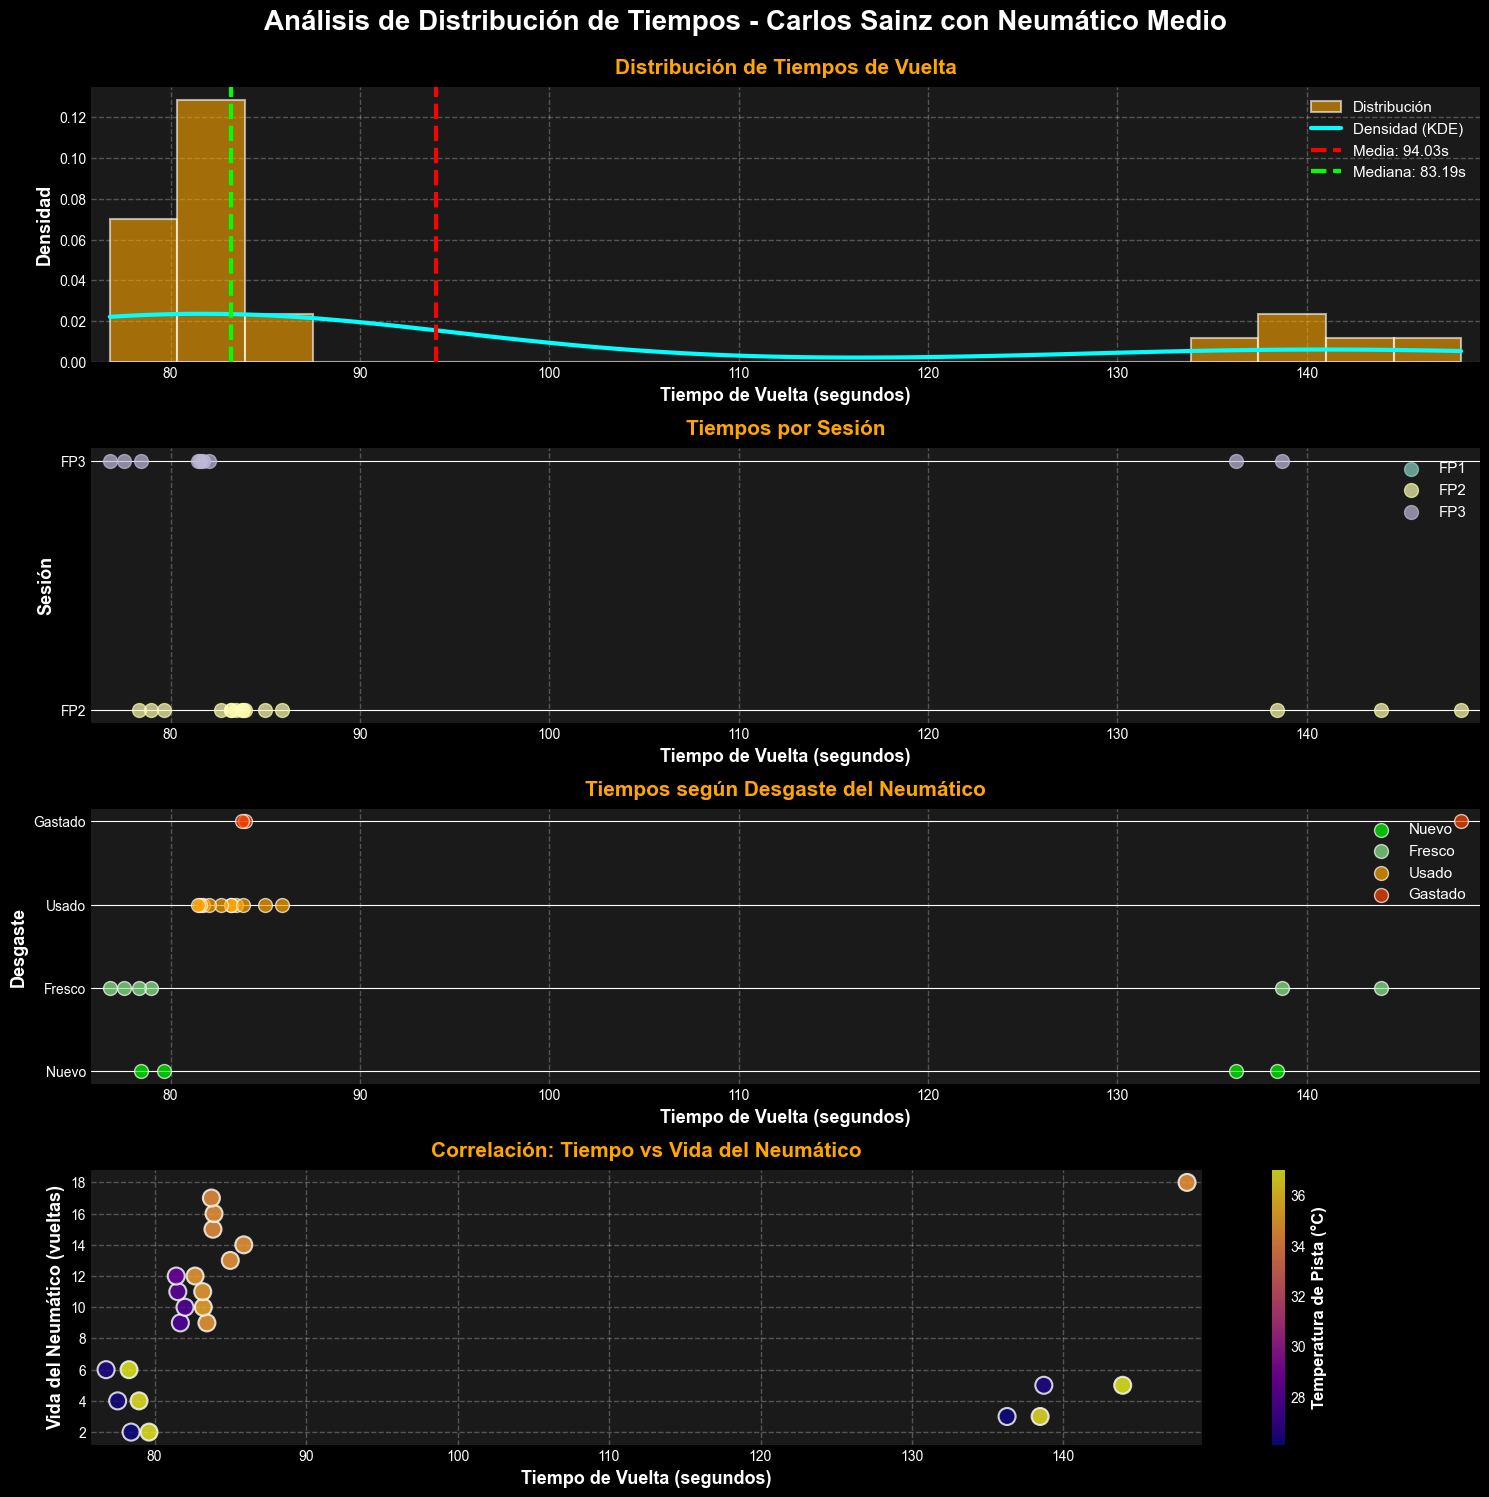


                         ESTADÍSTICAS DE DISTRIBUCIÓN

📊 Tiempos de Vuelta:
   Media:                   94.031s
   Mediana:                 83.191s
   Desviación estándar:     24.859s
   Mínimo:                  76.791s
   Máximo:                 148.159s
   Rango (max-min):         71.368s

📈 Correlaciones:
   Tiempo vs Vida del Neumático:         -0.133
   Tiempo vs Temperatura Pista:           0.044

                         DEGRADACIÓN DEL NEUMÁTICO POR VUELTA

🔧 Degradación promedio: -0.6629 segundos/vuelta

📉 Degradación acumulada estimada:
   Vuelta 5:         -3.314s
   Vuelta 10:        -6.629s
   Vuelta 15:        -9.943s
   Vuelta 18:       -11.932s

⚙️ Análisis por categoría de desgaste:
   Nuevo           Vida media:   2.5 vueltas | Tiempo medio: 108.202s
   Fresco          Vida media:   5.0 vueltas | Tiempo medio: 99.040s
   Usado           Vida media:  11.5 vueltas | Tiempo medio: 83.080s
   Gastado         Vida media:  17.0 vueltas | Tiempo medio: 105.275s


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualización mejorada de la distribución de tiempos con neumático medio
plt.style.use('dark_background')
fig, axes = plt.subplots(4, 1, figsize=(15, 15))
fig.suptitle('Análisis de Distribución de Tiempos - Carlos Sainz con Neumático Medio', 
             fontsize=20, fontweight='bold', color='white', y=0.995)

# Crear eje común de tiempo (en segundos)
tiempo_max = sainz_mediums_clean['LapTime'].max()
tiempo_min = sainz_mediums_clean['LapTime'].min()

# 1. Histograma de tiempos de vuelta con KDE
ax1 = axes[0]
ax1.hist(sainz_mediums_clean['LapTime'], bins=20, color='#FFA500', alpha=0.6, 
         edgecolor='white', linewidth=1.5, density=True, label='Distribución')

# Añadir curva KDE
from scipy import stats
kde = stats.gaussian_kde(sainz_mediums_clean['LapTime'])
x_range = np.linspace(tiempo_min, tiempo_max, 100)
ax1.plot(x_range, kde(x_range), color='cyan', linewidth=3, label='Densidad (KDE)')

ax1.axvline(sainz_mediums_clean['LapTime'].mean(), color='red', linestyle='--', 
            linewidth=3, label=f'Media: {sainz_mediums_clean["LapTime"].mean():.2f}s')
ax1.axvline(sainz_mediums_clean['LapTime'].median(), color='lime', linestyle='--', 
            linewidth=3, label=f'Mediana: {sainz_mediums_clean["LapTime"].median():.2f}s')

ax1.set_xlabel('Tiempo de Vuelta (segundos)', fontsize=13, fontweight='bold', color='white')
ax1.set_ylabel('Densidad', fontsize=13, fontweight='bold', color='white')
ax1.set_title('Distribución de Tiempos de Vuelta', fontsize=15, fontweight='bold', 
              color='#FFA500', pad=10)
ax1.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.25, linestyle='--', linewidth=1)
ax1.set_facecolor('#1a1a1a')
ax1.set_xlim(tiempo_min - 1, tiempo_max + 1)

# 2. Tiempos por sesión
ax2 = axes[1]
for session in session_order:
    session_data = sainz_mediums_clean[sainz_mediums_clean['Session'] == session]
    ax2.scatter(session_data['LapTime'], [session]*len(session_data), 
                s=100, alpha=0.7, label=session)

ax2.set_xlabel('Tiempo de Vuelta (segundos)', fontsize=13, fontweight='bold', color='white')
ax2.set_ylabel('Sesión', fontsize=13, fontweight='bold', color='white')
ax2.set_title('Tiempos por Sesión', fontsize=15, fontweight='bold', 
              color='#FFA500', pad=10)
ax2.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax2.grid(True, alpha=0.25, axis='x', linestyle='--', linewidth=1)
ax2.set_facecolor('#1a1a1a')
ax2.set_xlim(tiempo_min - 1, tiempo_max + 1)

# 3. Tiempos según desgaste del neumático
ax3 = axes[2]
degradation_order = ['Nuevo', 'Fresco', 'Usado', 'Gastado']
colors = ['#00FF00', '#90EE90', '#FFA500', '#FF4500']

for deg, color in zip(degradation_order, colors):
    deg_data = sainz_mediums_clean[sainz_mediums_clean['TyreDegradation'] == deg]
    ax3.scatter(deg_data['LapTime'], [deg]*len(deg_data), 
                s=100, alpha=0.7, color=color, label=deg, edgecolors='white', linewidth=1)

ax3.set_xlabel('Tiempo de Vuelta (segundos)', fontsize=13, fontweight='bold', color='white')
ax3.set_ylabel('Desgaste', fontsize=13, fontweight='bold', color='white')
ax3.set_title('Tiempos según Desgaste del Neumático', fontsize=15, fontweight='bold', 
              color='#FFA500', pad=10)
ax3.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax3.grid(True, alpha=0.25, axis='x', linestyle='--', linewidth=1)
ax3.set_facecolor('#1a1a1a')
ax3.set_xlim(tiempo_min - 1, tiempo_max + 1)

# 4. Tiempo vs Vida del neumático con temperatura
ax4 = axes[3]
scatter = ax4.scatter(sainz_mediums_clean['LapTime'], sainz_mediums_clean['TyreLife'],
                      c=sainz_mediums_clean['TrackTemp'], cmap='plasma', 
                      s=150, alpha=0.8, edgecolors='white', linewidth=1.5)

ax4.set_xlabel('Tiempo de Vuelta (segundos)', fontsize=13, fontweight='bold', color='white')
ax4.set_ylabel('Vida del Neumático (vueltas)', fontsize=13, fontweight='bold', color='white')
ax4.set_title('Correlación: Tiempo vs Vida del Neumático', fontsize=15, fontweight='bold', 
              color='#FFA500', pad=10)
ax4.grid(True, alpha=0.25, linestyle='--', linewidth=1)
ax4.set_facecolor('#1a1a1a')
ax4.set_xlim(tiempo_min - 1, tiempo_max + 1)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Temperatura de Pista (°C)', fontsize=12, fontweight='bold', color='white')
cbar.ax.tick_params(colors='white', labelsize=10)

plt.tight_layout()
plt.savefig('sainz_medium_tyre_distribution.png', dpi=300, bbox_inches='tight', 
            facecolor='#0d0d0d', edgecolor='none')
print("✅ Visualización mejorada guardada como: sainz_medium_tyre_distribution.png")
plt.show()

# Estadísticas adicionales con formato mejorado
print("\n" + "="*80)
print(" "*25 + "ESTADÍSTICAS DE DISTRIBUCIÓN")
print("="*80)
print(f"\n📊 Tiempos de Vuelta:")
print(f"   {'Media:':<20} {sainz_mediums_clean['LapTime'].mean():>10.3f}s")
print(f"   {'Mediana:':<20} {sainz_mediums_clean['LapTime'].median():>10.3f}s")
print(f"   {'Desviación estándar:':<20} {sainz_mediums_clean['LapTime'].std():>10.3f}s")
print(f"   {'Mínimo:':<20} {sainz_mediums_clean['LapTime'].min():>10.3f}s")
print(f"   {'Máximo:':<20} {sainz_mediums_clean['LapTime'].max():>10.3f}s")
print(f"   {'Rango (max-min):':<20} {sainz_mediums_clean['LapTime'].max() - sainz_mediums_clean['LapTime'].min():>10.3f}s")

corr_life = sainz_mediums_clean['LapTime'].corr(sainz_mediums_clean['TyreLife'])
corr_temp = sainz_mediums_clean['LapTime'].corr(sainz_mediums_clean['TrackTemp'])

print(f"\n📈 Correlaciones:")
print(f"   {'Tiempo vs Vida del Neumático:':<35} {corr_life:>8.3f}")
print(f"   {'Tiempo vs Temperatura Pista:':<35} {corr_temp:>8.3f}")

# Análisis de degradación
z = np.polyfit(sainz_mediums_clean['TyreLife'], sainz_mediums_clean['LapTime'], 1)
print("\n" + "="*80)
print(" "*25 + "DEGRADACIÓN DEL NEUMÁTICO POR VUELTA")
print("="*80)

degradacion_por_vuelta = z[0]
print(f"\n🔧 Degradación promedio: {degradacion_por_vuelta:.4f} segundos/vuelta")

vueltas_analisis = [5, 10, 15, 18]
print(f"\n📉 Degradación acumulada estimada:")
for vuelta in vueltas_analisis:
    if vuelta <= sainz_mediums_clean['TyreLife'].max():
        degradacion_acumulada = degradacion_por_vuelta * vuelta
        print(f"   {'Vuelta ' + str(vuelta) + ':':<15} {degradacion_acumulada:>8.3f}s")

print(f"\n⚙️ Análisis por categoría de desgaste:")
for categoria in degradation_order:
    datos_categoria = sainz_mediums_clean[sainz_mediums_clean['TyreDegradation'] == categoria]
    if len(datos_categoria) > 0:
        tiempo_medio = datos_categoria['LapTime'].mean()
        vida_media = datos_categoria['TyreLife'].mean()
        print(f"   {categoria:<15} Vida media: {vida_media:>5.1f} vueltas | Tiempo medio: {tiempo_medio:>6.3f}s")

print("="*80)


REGRESIÓN LINEAL - PREDICCIÓN DE VIDA ÚTIL DE NEUMÁTICOS BLANDOS

📊 Dimensiones del dataset original:
   Features (X): (24, 15)
   Target (y - TyreLife): (24,)

✅ Dimensiones después de limpiar NaN:
   Features (X): (22, 15)
   Target (y): (22,)

📈 Estadísticas de TyreLife:
count    22.000000
mean      8.727273
std       5.082011
min       2.000000
25%       4.250000
50%       9.000000
75%      11.750000
max      18.000000
Name: TyreLife, dtype: float64

✂️  División de datos:
   Entrenamiento: 15 muestras
   Prueba: 7 muestras

✅ Datos escalados con StandardScaler

MODELO DE REGRESIÓN LINEAL

📊 MÉTRICAS DEL MODELO:
   R² (Entrenamiento): 0.9613
   R² (Prueba): -416.3334
   RMSE (Prueba): 111.0524 vueltas
   MAE (Prueba): 65.9799 vueltas

IMPORTANCIA DE FACTORES (Coeficientes de Regresión)

🔥 Top Factores por Importancia:
     Factor  Coeficiente  Abs_Coeficiente
Sector1Time   123.740813       123.740813
Sector2Time   -70.689507        70.689507
    SpeedI1    67.064881        67.06488

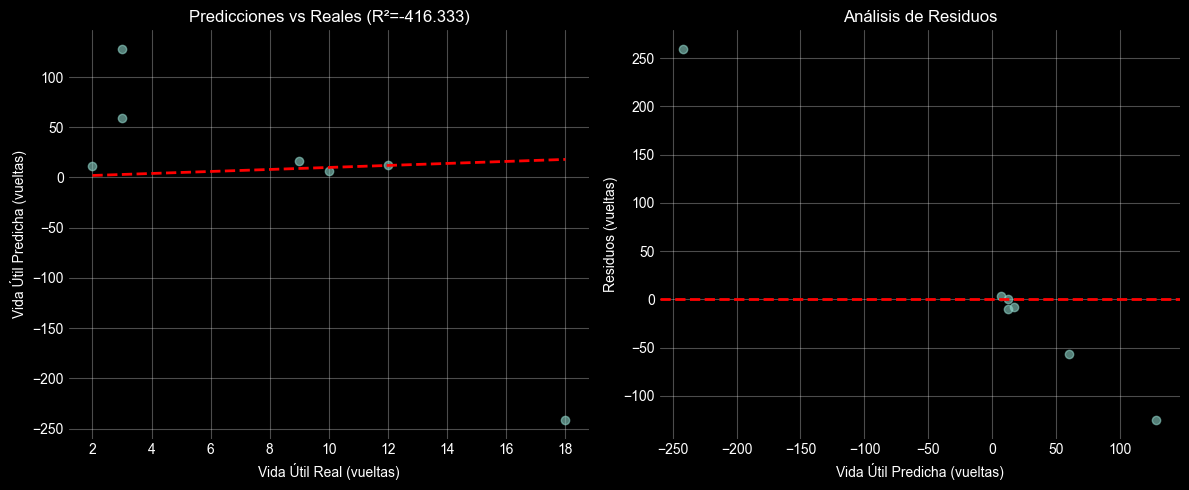


ANÁLISIS COMPLETADO


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Regresión Lineal para predecir vida útil óptima de neumáticos blandos

print("="*70)
print("REGRESIÓN LINEAL - PREDICCIÓN DE VIDA ÚTIL DE NEUMÁTICOS BLANDOS")
print("="*70)

# 1. Preparar datos para regresión
X = sainz_mediums_clean[[
    'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
    'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AvgSpeed',
    'AirTemp', 'TrackTemp', 'Humidity', 'Pressure', 'WindSpeed',
    'Stint'
]].copy()

# Variable objetivo: TyreLife (vueltas de vida del neumático)
y = sainz_mediums_clean['TyreLife'].copy()

print(f"\n📊 Dimensiones del dataset original:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y - TyreLife): {y.shape}")

# Eliminar NaN
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

print(f"\n✅ Dimensiones después de limpiar NaN:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")

print(f"\n📈 Estadísticas de TyreLife:")
print(y.describe())

# 2. Dividir datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\n✂️  División de datos:")
print(f"   Entrenamiento: {X_train.shape[0]} muestras")
print(f"   Prueba: {X_test.shape[0]} muestras")

# 3. Escalar características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Datos escalados con StandardScaler")

# 4. Entrenar modelo de Regresión Lineal
print(f"\n{'='*70}")
print("MODELO DE REGRESIÓN LINEAL")
print(f"{'='*70}")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

# 5. Métricas de evaluación
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"\n📊 MÉTRICAS DEL MODELO:")
print(f"   R² (Entrenamiento): {r2_train:.4f}")
print(f"   R² (Prueba): {r2_test:.4f}")
print(f"   RMSE (Prueba): {rmse_test:.4f} vueltas")
print(f"   MAE (Prueba): {mae_test:.4f} vueltas")

# 6. Importancia de factores (coeficientes)
print(f"\n{'='*70}")
print("IMPORTANCIA DE FACTORES (Coeficientes de Regresión)")
print(f"{'='*70}")

coefficients = pd.DataFrame({
    'Factor': X.columns,
    'Coeficiente': lr_model.coef_,
    'Abs_Coeficiente': np.abs(lr_model.coef_)
}).sort_values('Abs_Coeficiente', ascending=False)

print(f"\n🔥 Top Factores por Importancia:")
print(coefficients.to_string(index=False))

# 7. Vida útil óptima del neumático
print(f"\n{'='*70}")
print("ANÁLISIS DE VIDA ÚTIL ÓPTIMA")
print(f"{'='*70}")

print(f"\n📌 Intercepto del modelo: {lr_model.intercept_:.2f} vueltas")
print(f"\n💡 Interpretación de coeficientes:")
print(f"   - Coeficiente positivo: aumenta la vida útil")
print(f"   - Coeficiente negativo: reduce la vida útil")

# Vida útil óptima basada en datos
vida_util_media = y.mean()
vida_util_optima = y.quantile(0.75)  # 75% percentil
vida_util_maxima = y.max()

print(f"\n🏁 RECOMENDACIONES DE VIDA ÚTIL:")
print(f"   Media observada: {vida_util_media:.1f} vueltas")
print(f"   Óptima (75% percentil): {vida_util_optima:.1f} vueltas")
print(f"   Máxima registrada: {vida_util_maxima:.1f} vueltas")

# 8. Análisis de degradación por vueltas
degradacion_por_vuelta = sainz_mediums_clean.groupby('TyreLife').agg({
    'LapTime': 'mean',
    'AvgSpeed': 'mean'
}).reset_index()

print(f"\n📉 Degradación por vueltas:")
print(degradacion_por_vuelta.to_string(index=False))

# 9. Guardar modelo
joblib.dump(lr_model, 'tyre_life_regression_model.pkl')
joblib.dump(scaler, 'tyre_life_scaler.pkl')

print(f"\n💾 Modelo guardado como: tyre_life_regression_model.pkl")
print(f"💾 Scaler guardado como: tyre_life_scaler.pkl")

# 10. Función de predicción
def predecir_vida_util(lap_time, sector1, sector2, sector3, 
                       speed_i1, speed_i2, speed_fl, speed_st,
                       air_temp, track_temp, humidity, pressure, 
                       wind_speed, stint):
    """
    Predice la vida útil restante del neumático
    """
    avg_speed = (speed_i1 + speed_i2 + speed_fl + speed_st) / 4
    
    features = np.array([[
        lap_time, sector1, sector2, sector3,
        speed_i1, speed_i2, speed_fl, speed_st, avg_speed,
        air_temp, track_temp, humidity, pressure, wind_speed,
        stint
    ]])
    
    features_scaled = scaler.transform(features)
    vida_predicha = lr_model.predict(features_scaled)[0]
    
    return vida_predicha

print(f"\n✅ Función 'predecir_vida_util()' creada y lista para usar")

# 11. Visualización (si matplotlib está disponible)
print(f"\n📊 Creando visualización de predicciones...")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Vida Útil Real (vueltas)')
plt.ylabel('Vida Útil Predicha (vueltas)')
plt.title(f'Predicciones vs Reales (R²={r2_test:.3f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Vida Útil Predicha (vueltas)')
plt.ylabel('Residuos (vueltas)')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tyre_life_regression_analysis.png', dpi=150, bbox_inches='tight')
print(f"💾 Gráfico guardado como: tyre_life_regression_analysis.png")

plt.show()

print(f"\n{'='*70}")
print("ANÁLISIS COMPLETADO")
print(f"{'='*70}")